Nama: : Jessica Theresia<br>
Email: : me.jessicatheresia@gmail.com<br>
ID Dicoding: : jessica_trs<br>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Ketentuan Dataset**:
   - Dataset "bank_transactions_data_2.csv"
   - Jumlah Data: 2,512 baris (memenuhi syarat minimal 1000 baris)
   - Jumlah Fitur: 16 kolom (terdiri dari numerikal & kategorikal)
   - Jenis Data:
    * Numerik: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance
    * Kategorikal: TransactionType, Location, CustomerOccupation, Channel, dll.

Repository : https://github.com/Jejetrs/Dicoding-DBS-Camp---ML-Pemula-Module..git

# **2. Import Library**

Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
import zipfile
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import zscore
from scipy.stats import skew

# **3. Memuat Dataset**

Pada tahap ini untuk memuat dataset yang memiliki format CSV serta memastikan direktorinya benar, menghubungkan Google Drive ke Colab terlebih dahulu.

In [2]:
# Memuat dataset dari Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memuat dataset dengan path yang benar
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_clustering.csv")

# Menampilkan beberapa baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
# Missing value
missing_values = df.isnull().sum()

print("Jumlah missing value per kolom:")
print(missing_values)

total_missing = missing_values.sum()
print(f"\nTotal missing values dalam dataset: {total_missing}")

Jumlah missing value per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Total missing values dalam dataset: 0


In [6]:
# data duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

Jumlah data duplikat: 0


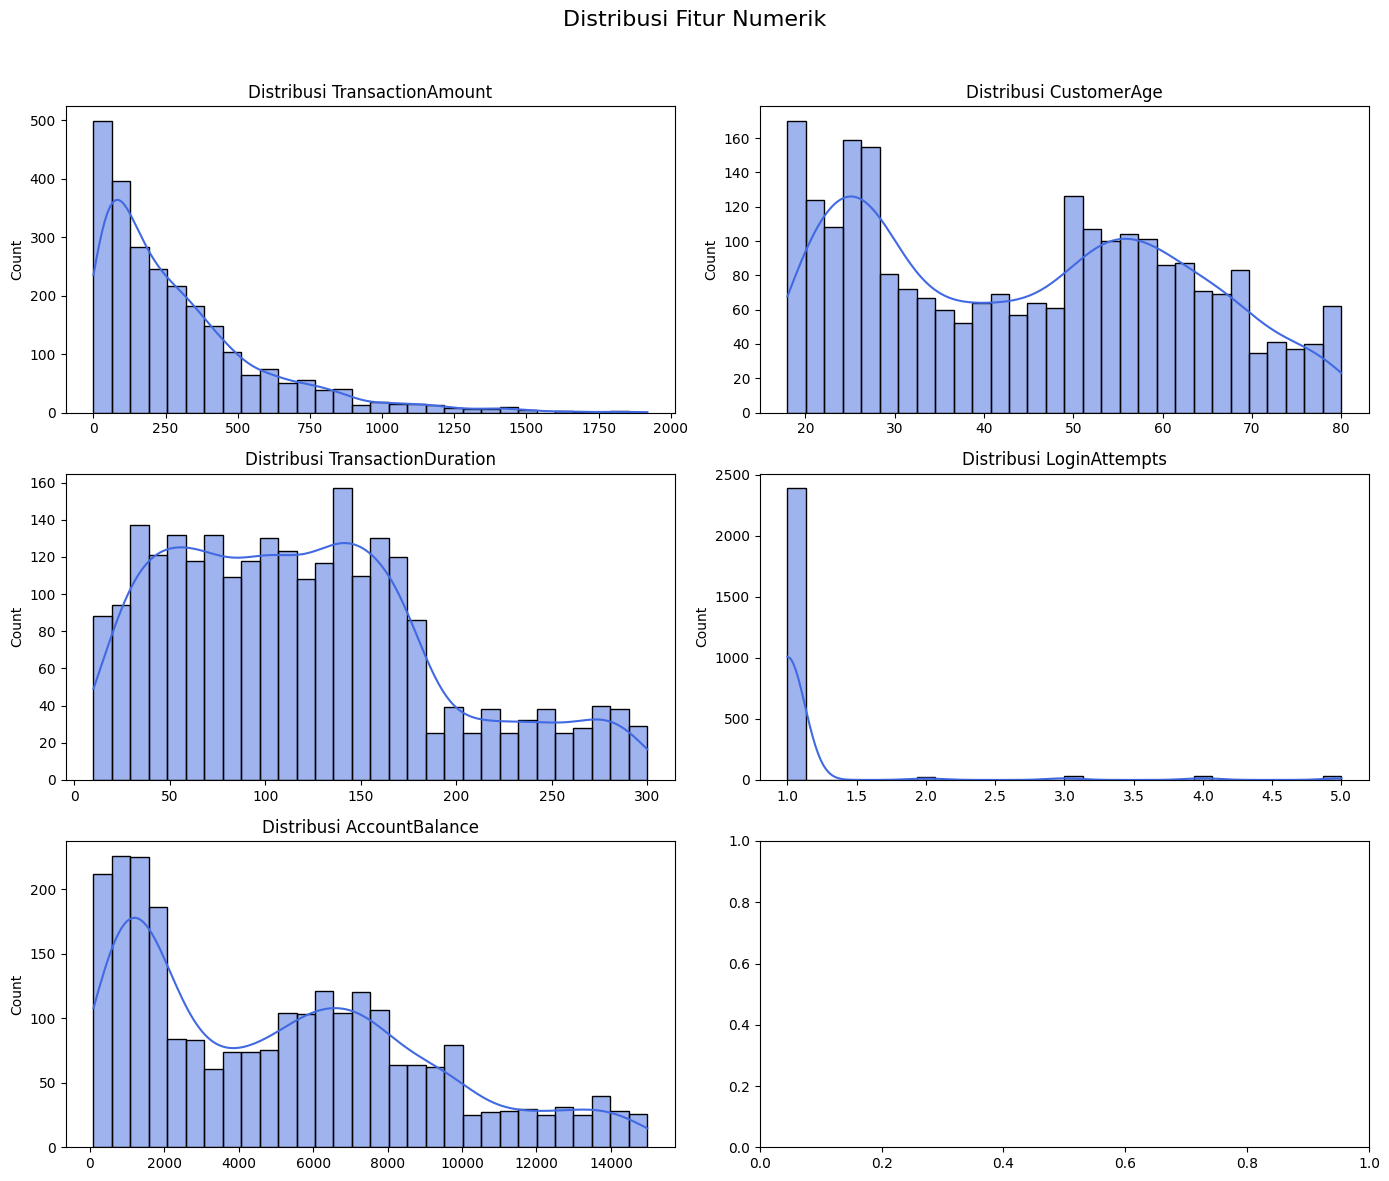

In [7]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribusi Fitur Numerik", fontsize=16)

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
# Identifikasi fitur numeric
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in numerical_features}
unique_values

{'TransactionAmount': 2455,
 'CustomerAge': 63,
 'TransactionDuration': 288,
 'LoginAttempts': 5,
 'AccountBalance': 2510}

In [9]:
# Identifikasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.to_list()

# Hitung jumlah kategori unik dalam setiap fitur
unique_values = {col: df[col].nunique() for col in categorical_features}
unique_values

{'TransactionID': 2512,
 'AccountID': 495,
 'TransactionDate': 2512,
 'TransactionType': 2,
 'Location': 43,
 'DeviceID': 681,
 'IP Address': 592,
 'MerchantID': 100,
 'Channel': 3,
 'CustomerOccupation': 4,
 'PreviousTransactionDate': 360}

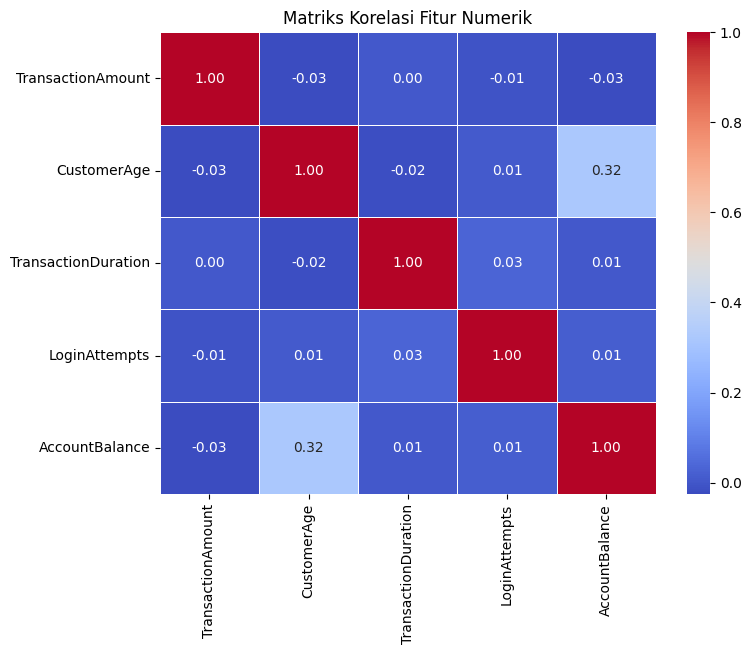

In [10]:
# Hitung korelasi antara fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang saya lakukan :
1. Transformasi Quantile untuk TransactionAmount dan Boxcox untuk LoginAttempts
  * Menggunakan Quantile Transformer untuk mengubah distribusi menjadi normal.
  * Visualisasi histogram sebelum & sesudah transformasi untuk melihat perbedaan distribusi.
  * Menggunakan Tranformasi Boxcox untuk mengatasi nilai skew yang besar untuk mencapai nilai normal.

2. Penghapusan Kolom yang Tidak Relevan
  * Menghapus kolom seperti TransactionID, AccountID, TransactionDate, dll., karena tidak relevan untuk analisis.

3. Encoding Variabel Kategorikal
  * Menggunakan Label Encoding untuk mengubah variabel kategorikal (TransactionType, Location, dll.) menjadi bentuk numerik.

4. Normalisasi Data Numerik
  * StandardScaler digunakan untuk menstandarisasi fitur numerik (TransactionAmount, CustomerAge, dll.).
  * Log Transform (log1p) diterapkan ke LoginAttempts untuk mengatasi skewness.

5. Visualisasi Korelasi Fitur
  * Heatmap korelasi dibuat untuk melihat hubungan antar fitur numerik setelah preprocessing.

In [11]:
# Deteksi Outlier dengan Z-Score
df_outlier = df.copy()
z_scores = np.abs(zscore(df_outlier.select_dtypes(include=['number'])))
outliers_z = (z_scores > 3).sum(axis=0)

print("\nJumlah Outlier per Kolom (Z-Score > 3):")
print(outliers_z)


Jumlah Outlier per Kolom (Z-Score > 3):
TransactionAmount      48
CustomerAge             0
TransactionDuration     0
LoginAttempts          95
AccountBalance          0
dtype: int64


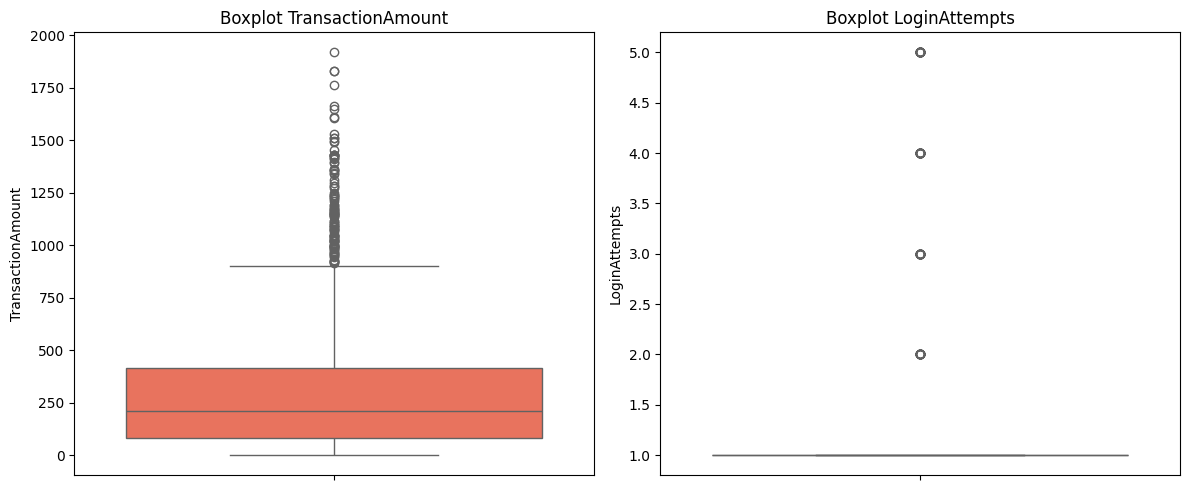

In [12]:
# Visualisasi outlier
outlier_features = ["TransactionAmount", "LoginAttempts"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(outlier_features):
    sns.boxplot(y=df[col], ax=axes[i], color='tomato')
    axes[i].set_title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [13]:
# Mendeteksi outlier pada LoginAttempts

# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_login, lower_l, upper_l = detect_outliers_iqr(df, "LoginAttempts")

# Winsorization untuk LoginAttempts
df["LoginAttempts"] = np.where(
    df["LoginAttempts"] < lower_l, lower_l,
    np.where(df["LoginAttempts"] > upper_l, upper_l, df["LoginAttempts"])
)

outliers_after_loginAttempts, _, _ = detect_outliers_iqr(df, "LoginAttempts")
outliers_after_loginAttempts.shape[0]

0

In [14]:
# Mendeteksi outlier pada TransactionAmount
outliers_transaction, lower_t, upper_t = detect_outliers_iqr(df, "TransactionAmount")

# Winsorization untuk TransactionAmount
df["TransactionAmount"] = np.where(
    df["TransactionAmount"] < lower_t, lower_t,
    np.where(df["TransactionAmount"] > upper_t, upper_t, df["TransactionAmount"])
)
# Verifikasi apakah outlier masih ada setelah winsorization
outliers_after_TransactionAmount, _, _ = detect_outliers_iqr(df, "TransactionAmount")
outliers_after_TransactionAmount.shape[0]

0

In [15]:
# Menghapus kolom yang tidak relevan
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Tipe data tiap kolom yang digunakan sebelum encoding:\n", df.dtypes)

Tipe data tiap kolom yang digunakan sebelum encoding:
 TransactionAmount      float64
TransactionType         object
Location                object
DeviceID                object
MerchantID              object
Channel                 object
CustomerAge              int64
CustomerOccupation      object
TransactionDuration      int64
LoginAttempts          float64
AccountBalance         float64
dtype: object


In [16]:
# Encoding Variabel Kategorikal

label_encoders = {}
categorical_features = ["TransactionType", "Location", "DeviceID", "MerchantID", "Channel", "CustomerOccupation"]
for col in categorical_features:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Simpan encoder untuk inverse transform nanti

print("Kolom setelah encoding:\n", df.columns)

Kolom setelah encoding:
 Index(['TransactionAmount', 'TransactionType', 'Location', 'DeviceID',
       'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [17]:
# Normalisasi data
scalers = {}

numeric_cols = ['CustomerAge', 'TransactionDuration', 'AccountBalance','LoginAttempts','TransactionAmount']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Dataset setelah preprocessing
print("Dataset setelah preprocessing:")

df.head()

Dataset setelah preprocessing:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.074361,1,36,365,14,0,1.423718,0,-0.552443,0.0,-0.000537
1,0.362645,1,15,50,51,0,1.311287,0,0.305314,0.0,2.216472
2,-0.629153,1,23,229,8,2,-1.443277,3,-0.909842,0.0,-1.023534
3,-0.398176,1,33,182,1,2,-1.049768,3,-1.353017,0.0,0.885797
4,-1.076900,0,1,298,90,2,-1.049768,3,1.120184,0.0,0.593589


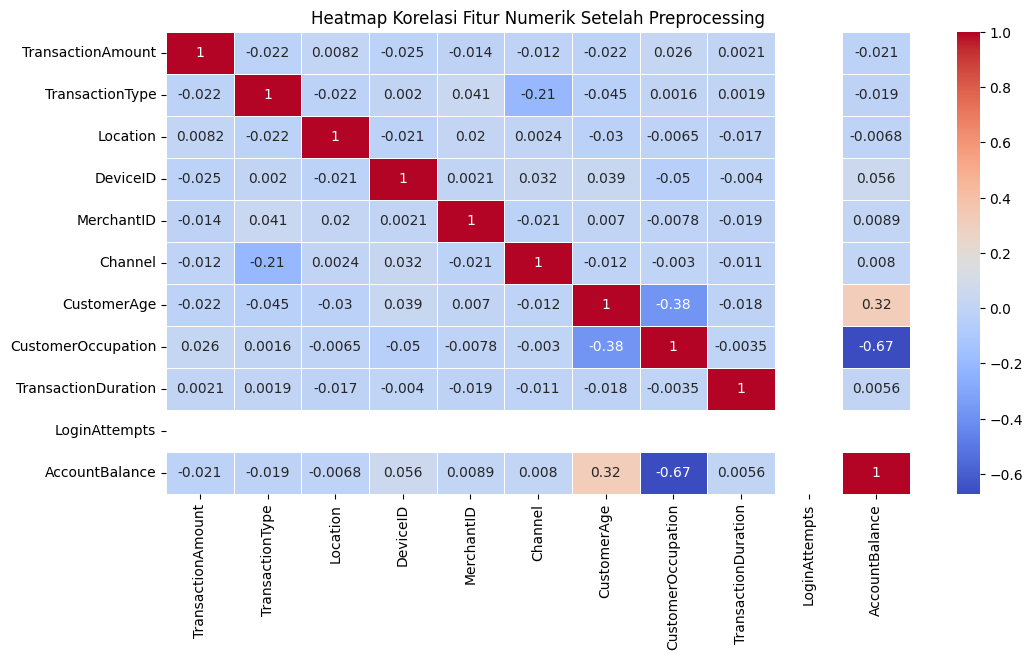

In [18]:
# Membuat heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik Setelah Preprocessing")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan kemudian melatih model dengan data menggunakan algoritma tersebut.

In [19]:
# Model dengan algoritma KMeans
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=20)
labels_temp = kmeans_temp.fit_predict(df)

## **b. Evaluasi Model Clustering**

Evaluasi KMeans Clustering dengan Elbow Method & Silhouette Score
Kode ini bertujuan untuk menentukan jumlah cluster optimal dengan dua metode evaluasi:

1. Elbow Method
* Tujuan: Menganalisis inertia (jumlah total jarak titik ke centroid) untuk menentukan jumlah cluster optimal.

2. Silhouette Score
* Tujuan: Mengevaluasi seberapa baik setiap titik data berada dalam cluster yang benar.

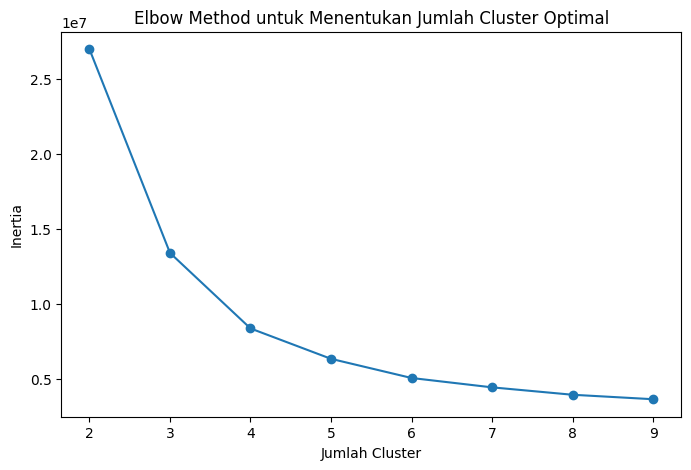

Optimal jumlah cluster (k) berdasarkan Elbow Method: 6


In [20]:
# Evaluasi Elbow
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

optimal_k_elbow = k_values[np.argmin(np.diff(inertia, 2))]  # Menentukan elbow point
print(f"Optimal jumlah cluster (k) berdasarkan Elbow Method: {optimal_k_elbow}")

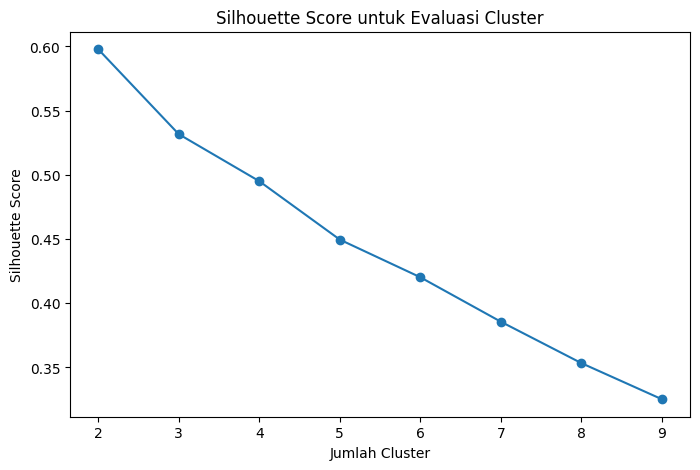

Optimal jumlah cluster (k) berdasarkan Silhouette Score: 2
Silhouette Score tertinggi: 0.5978320073619421


In [21]:
# Evaluasi Silhouette Score

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Cluster')
plt.show()

# Mengecek Silhouette Score untuk berbagai metode clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)
print(f"Optimal jumlah cluster (k) berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score tertinggi: {optimal_silhouette_score}")

## **c. Feature Selection (Opsional)**

Feature selection yang digunakan dalam kode ini adalah SelectKBest dengan mutual_info_classif sebagai metode pemilihan fitur terbaik. Berikut penjelasan singkatnya:

1. SelectKBest (Feature Selection)

  * Tujuan: Memilih 8 fitur terbaik dari dataset berdasarkan hubungan dengan label (target).
  * Metode: Menggunakan mutual information classification, yaitu mengukur hubungan antara setiap fitur dengan target secara non-linear.
  * Hasil: Dataset baru dengan hanya 8 fitur terpilih, yang digunakan untuk analisis lebih lanjut.

2. PCA (Dimensionality Reduction)
  * Tujuan: Mengurangi dimensi fitur terpilih menjadi 2 komponen utama, menjaga informasi utama dari data.
  * Manfaat: Mengurangi kompleksitas data dan meningkatkan efisiensi pemrosesan.

3. KMeans Clustering dengan PCA
  * Menguji jumlah cluster (k) dari 2 hingga 9, dengan mengevaluasi menggunakan Silhouette Score.
  * Memilih jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi.
  * Menjalankan KMeans dengan jumlah cluster terbaik dan menambahkan label cluster ke dataset.

In [22]:
# SelectKBest dengan 8 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_selected = selector.fit_transform(df, labels_temp)
selected_features = df.columns[selector.get_support()]
df_selected = df[selected_features]

print(f"Fitur yang dipilih setelah SelectKBest: {list(selected_features)}")

Fitur yang dipilih setelah SelectKBest: ['Location', 'DeviceID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


In [23]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)
print(f"Dimensi df_pca : {df_pca.shape}")

# Total varians yang dijelaskan oleh PCA
print(f"Total varians yang dijelaskan oleh PCA: {sum(pca.explained_variance_ratio_):.2f}")

Dimensi df_pca : (2512, 2)
Total varians yang dijelaskan oleh PCA: 1.00


In [24]:
# Clustering dengan KMeans setelah PCA
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Tentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal jumlah cluster (k) setelah PCA: {optimal_k}")

# Latih ulang KMeans dengan jumlah cluster terbaik
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
labels_pca = kmeans_pca.fit_predict(df_pca)

df['Cluster_KMeans'] = labels_pca

# Evaluasi Silhouette Score terbaik
silhouette_kmeans = silhouette_score(df_pca, labels_pca)
print(f"Silhouette Score KMeans terbaik setelah PCA: {silhouette_kmeans}")

Optimal jumlah cluster (k) setelah PCA: 2
Silhouette Score KMeans terbaik setelah PCA: 0.6226671102216185


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

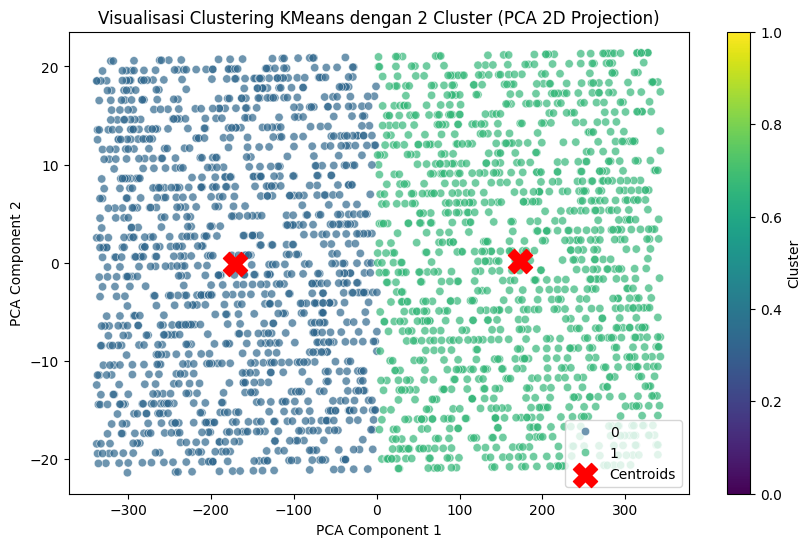

In [25]:
# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette='viridis', alpha=0.7)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Visualisasi Clustering KMeans dengan {optimal_k} Cluster (PCA 2D Projection)")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()

In [26]:
print(f"Dimensi df_pca: {df_pca.shape}")

Dimensi df_pca: (2512, 2)


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target
Melakukan Inverse Transform pada Data Target Setelah Clustering

Setelah melakukan clustering dengan model KMeans, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya.

In [27]:
df_normalized = df.copy()

In [28]:
df_normalized["Cluster_KMeans"] = labels_pca

In [29]:
for feature in categorical_features:
    if feature in df_normalized.columns and feature in label_encoders:
        df_normalized[feature] = label_encoders[feature].inverse_transform(df_normalized[feature])

print(df_normalized[categorical_features].head())

  TransactionType   Location DeviceID MerchantID Channel CustomerOccupation
0           Debit  San Diego  D000380       M015     ATM             Doctor
1           Debit    Houston  D000051       M052     ATM             Doctor
2           Debit       Mesa  D000235       M009  Online            Student
3           Debit    Raleigh  D000187       M002  Online            Student
4          Credit    Atlanta  D000308       M091  Online            Student


### Inverse Data Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [30]:
# Pastikan df_normalized sudah memiliki kolom yang sama dengan saat normalisasi
df_normalized[numeric_cols] = scaler.inverse_transform(df_normalized[numeric_cols])

In [31]:
# Hasil dataset setelah inverse transform
df_normalized.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster_KMeans
0,14.09,Debit,San Diego,D000380,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,Houston,D000051,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Mesa,D000235,M009,Online,19.0,Student,56.0,1.0,1122.35,0
3,184.50,Debit,Raleigh,D000187,M002,Online,26.0,Student,25.0,1.0,8569.06,0
4,13.45,Credit,Atlanta,D000308,M091,Online,26.0,Student,198.0,1.0,7429.40,0


# Analisis karakteristik tiap cluster

In [32]:
# Pastikan df sudah berisi data asli (tanpa normalisasi)
cluster_summary = df_normalized.groupby('Cluster_KMeans').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max'],
    'AccountBalance': ['mean', 'median', 'min', 'max'],
    'TransactionDuration': ['mean', 'median', 'min', 'max'],
    'CustomerAge': ['mean', 'median', 'min', 'max'],
    'LoginAttempts': ['mean', 'median', 'min', 'max']
}).reset_index()

# Ratakan multi-index kolom agar bisa di-merge
cluster_summary.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in cluster_summary.columns]

# Tambahkan distribusi kategori dalam tiap cluster
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
cluster_categorical = df_normalized.groupby('Cluster_KMeans')[categorical_features].agg(lambda x: x.mode()[0]).reset_index()

# Gabungkan hasil analisis numerik & kategorikal
cluster_analysis = pd.merge(cluster_summary, cluster_categorical, left_on="Cluster_KMeans_", right_on="Cluster_KMeans").drop(columns=["Cluster_KMeans_"])

# Tampilkan hasil
print(cluster_analysis.head())

   TransactionAmount_mean  TransactionAmount_median  TransactionAmount_min  \
0              292.339084                    216.76                   0.26   
1              277.271440                    204.63                   0.84   

   TransactionAmount_max  AccountBalance_mean  AccountBalance_median  \
0              913.49125          4919.300855                4471.05   
1              913.49125          5311.490849                5009.29   

   AccountBalance_min  AccountBalance_max  TransactionDuration_mean  \
0              105.01            14942.78                120.206651   
1              101.25            14977.99                119.073659   

   TransactionDuration_median  ...  CustomerAge_min  CustomerAge_max  \
0                       114.0  ...             18.0             80.0   
1                       112.0  ...             18.0             80.0   

   LoginAttempts_mean  LoginAttempts_median  LoginAttempts_min  \
0                 1.0                   1.0        

In [33]:
# Cetak hasil analisis untuk tiap cluster dalam format vertikal, mulai dari 1
for index, row in cluster_analysis.iterrows():
    cluster_number = int(row['Cluster_KMeans'])  # Ubah indeks cluster agar dimulai dari 1
    print(f"\nCluster {cluster_number}")
    print("=" * 40)

    print("Transaction Amount")
    print(f"   - Mean  : {row['TransactionAmount_mean']:.2f}")
    print(f"   - Median: {row['TransactionAmount_median']:.2f}")
    print(f"   - Min   : {row['TransactionAmount_min']:.2f}")
    print(f"   - Max   : {row['TransactionAmount_max']:.2f}\n")

    print("Account Balance")
    print(f"   - Mean  : {row['AccountBalance_mean']:.2f}")
    print(f"   - Median: {row['AccountBalance_median']:.2f}")
    print(f"   - Min   : {row['AccountBalance_min']:.2f}")
    print(f"   - Max   : {row['AccountBalance_max']:.2f}\n")

    print("Transaction Duration")
    print(f"   - Mean  : {row['TransactionDuration_mean']:.2f}")
    print(f"   - Median: {row['TransactionDuration_median']:.2f}")
    print(f"   - Min   : {row['TransactionDuration_min']:.2f}")
    print(f"   - Max   : {row['TransactionDuration_max']:.2f}\n")

    print("Customer Age")
    print(f"   - Mean  : {row['CustomerAge_mean']:.2f}")
    print(f"   - Median: {row['CustomerAge_median']:.2f}")
    print(f"   - Min   : {row['CustomerAge_min']:.2f}")
    print(f"   - Max   : {row['CustomerAge_max']:.2f}\n")

    print("Login Attempts")
    print(f"   - Mean  : {row['LoginAttempts_mean']:.2f}")
    print(f"   - Median: {row['LoginAttempts_median']:.2f}")
    print(f"   - Min   : {row['LoginAttempts_min']:.2f}")
    print(f"   - Max   : {row['LoginAttempts_max']:.2f}\n")

    print("Dominan Kategori")
    print(f"   - Transaction Type  : {row['TransactionType']}")
    print(f"   - Channel          : {row['Channel']}")
    print(f"   - Customer Occupation: {row['CustomerOccupation']}")

    print("=" * 40)


Cluster 0
Transaction Amount
   - Mean  : 292.34
   - Median: 216.76
   - Min   : 0.26
   - Max   : 913.49

Account Balance
   - Mean  : 4919.30
   - Median: 4471.05
   - Min   : 105.01
   - Max   : 14942.78

Transaction Duration
   - Mean  : 120.21
   - Median: 114.00
   - Min   : 10.00
   - Max   : 300.00

Customer Age
   - Mean  : 44.39
   - Median: 45.00
   - Min   : 18.00
   - Max   : 80.00

Login Attempts
   - Mean  : 1.00
   - Median: 1.00
   - Min   : 1.00
   - Max   : 1.00

Dominan Kategori
   - Transaction Type  : Debit
   - Channel          : Branch
   - Customer Occupation: Student

Cluster 1
Transaction Amount
   - Mean  : 277.27
   - Median: 204.63
   - Min   : 0.84
   - Max   : 913.49

Account Balance
   - Mean  : 5311.49
   - Median: 5009.29
   - Min   : 101.25
   - Max   : 14977.99

Transaction Duration
   - Mean  : 119.07
   - Median: 112.00
   - Min   : 10.00
   - Max   : 300.00

Customer Age
   - Mean  : 44.96
   - Median: 46.00
   - Min   : 18.00
   - Max   : 80.0

In [34]:
# Hitung statistik numerik per cluster
cluster_summary = df_normalized.groupby('Cluster_KMeans').agg({
    'TransactionAmount': 'mean',
    'AccountBalance': 'mean',
    'TransactionDuration': 'mean',
    'CustomerAge': 'mean',
    'LoginAttempts': 'mean'
}).reset_index()

# Tambahkan distribusi kategori dalam tiap cluster
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
cluster_categorical = df_normalized.groupby('Cluster_KMeans')[categorical_features].agg(lambda x: x.mode()[0]).reset_index()

# Gabungkan hasil analisis numerik & kategorikal
cluster_analysis = pd.merge(cluster_summary, cluster_categorical, on="Cluster_KMeans")

# Ubah nomor cluster agar dimulai dari 1
cluster_analysis['Cluster_KMeans']

# Cetak hasil analisis tiap cluster
for index, row in cluster_analysis.iterrows():
    print(f"Cluster {int(row['Cluster_KMeans'])}:")
    print("=" * 40)
    print(f"Rata-rata Transaction Amount  : {row['TransactionAmount']:.2f}")
    print(f"Rata-rata Account Balance     : {row['AccountBalance']:.2f}")
    print(f"Rata-rata Transaction Duration: {row['TransactionDuration']:.2f}")
    print(f"Rata-rata Customer Age        : {row['CustomerAge']:.2f}")
    print(f"Rata-rata Login Attempt       : {row['LoginAttempts']:.2f}")
    print("\nDominan Kategori")
    print(f"Transaction Type              : {row['TransactionType']}")
    print(f"Channel                       : {row['Channel']}")
    print(f"Customer Occupation           : {row['CustomerOccupation']}")
    print("=" * 40, "\n")

Cluster 0:
Rata-rata Transaction Amount  : 292.34
Rata-rata Account Balance     : 4919.30
Rata-rata Transaction Duration: 120.21
Rata-rata Customer Age        : 44.39
Rata-rata Login Attempt       : 1.00

Dominan Kategori
Transaction Type              : Debit
Channel                       : Branch
Customer Occupation           : Student

Cluster 1:
Rata-rata Transaction Amount  : 277.27
Rata-rata Account Balance     : 5311.49
Rata-rata Transaction Duration: 119.07
Rata-rata Customer Age        : 44.96
Rata-rata Login Attempt       : 1.00

Dominan Kategori
Transaction Type              : Debit
Channel                       : Branch
Customer Occupation           : Doctor



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

* Cluster 0
  - Transaksi Rata-rata: 292.34
  - Saldo Rata-rata: 4919.30
  - Durasi Transaksi Rata-rata: 120.21 detik
  - Usia Pelanggan Rata-rata: 44.39 tahun
  - Rata-rata Percobaan Login: 1.00
  - Kategori Dominan:
    - Tipe Transaksi: Debit
    - Saluran Transaksi: Branch (cabang fisik)
    - Pekerjaan Pelanggan: Student

  * **Interpretasi:**<br>
  Pelanggan dalam Cluster 0 didominasi oleh mahasiswa yang memiliki saldo rekening lebih rendah dibandingkan Cluster 1. Meskipun jumlah transaksi rata-rata lebih tinggi, mereka tetap lebih sering menggunakan transaksi debit di cabang bank. Hal ini menunjukkan bahwa kelompok ini masih mengandalkan layanan perbankan konvensional, kemungkinan karena preferensi terhadap interaksi langsung atau keterbatasan akses ke layanan digital.

* Cluster 1
  - Transaksi Rata-rata: 277.27
  - Saldo Rata-rata: 5311.49
  - Durasi Transaksi Rata-rata: 119.07 detik
  - Usia Pelanggan Rata-rata: 44.96 tahun
  - Rata-rata Percobaan Login: 1.00
  - Kategori Dominan:
    - Tipe Transaksi: Debit
    - Saluran Transaksi: Branch (cabang fisik)
    - Pekerjaan Pelanggan: Doctor

  - **Interpretasi:**<br>
  Cluster 1 didominasi oleh dokter yang memiliki saldo rekening lebih tinggi dibandingkan Cluster 0. Meskipun jumlah transaksi rata-rata sedikit lebih rendah, mereka tetap lebih sering menggunakan transaksi debit dan lebih mengandalkan layanan perbankan di cabang fisik. Dengan usia pelanggan yang sedikit lebih tua, ada kemungkinan mereka memiliki kebiasaan transaksi yang lebih stabil dan terencana.<br>
  <br>

* ** Jika dikatikan dengan Wawasan Bisnis dan Indikasi Potensi Fraud**
1. Kesamaan pola transaksi dalam kedua cluster menunjukkan bahwa sebagian besar pelanggan masih mengandalkan cabang bank untuk melakukan transaksi, sehingga digitalisasi layanan perbankan dapat menjadi peluang pengembangan strategi bisnis.
2. Persamaan rata-rata percobaan login (1 kali) menunjukkan bahwa pelanggan jarang mengalami kendala dalam mengakses akun mereka, mengurangi kemungkinan adanya aktivitas login mencurigakan.
3. Strategi Produk Perbankan:
  - Cluster 0 (Mahasiswa): Saldo lebih rendah, sehingga bank dapat menawarkan rekening khusus mahasiswa, cashback edukasi, atau program literasi keuangan
  - Cluster 1 (Dokter): Saldo lebih tinggi, yang bisa menjadi target produk keuangan eksklusif, seperti investasi atau layanan premium banking.
5. Pola transaksi yang tiba-tiba berubah, seperti peningkatan mendadak dalam jumlah transaksi atau saldo, bisa menjadi indikasi anomali yang perlu dianalisis lebih lanjut untuk mendeteksi potensi fraud.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Tentukan nama file dan path penyimpanan
file_name = "Dataset_inisiasi.csv"  # Ganti dengan nama yang diinginkan
output_path = f"/content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/{file_name}"

# Simpan DataFrame ke dalam file CSV di Google Drive
df_normalized.to_csv(output_path, index=False)

print(f"Hasil clustering telah disimpan di Google Drive sebagai: {output_path}")

Hasil clustering telah disimpan di Google Drive sebagai: /content/drive/MyDrive/Dicoding ML Submission/Belajar Machine Learning untuk Pemula/Dataset_inisiasi.csv
